 $$U(x)=\frac{x^4}{4}+\frac{x^3}{3}-x^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [2]:
def potential(a):
  def rhs(t, X):
    x, y = X
    return [y, -x**3-x**2+2*x - a*y]
  return rhs

def find_eq(): # equilibrium
  def quad_eq_solve(a, b, c):
    D = b**2. - 4.*a*c
    r1 = (-b + np.sqrt(D))/2.
    r2 = (-b - np.sqrt(D))/2.
    return r1, r2
  x1, x2 = quad_eq_solve(1., 1., -2.)
  x3 = 0.
  eq = np.array([(x1, 0.),(x2, 0.), (x3, 0.)])
  return eq

def eigenvectors(t, eq, a): 
  def jacobian(t, eq, a):
    def diff_rhs(t, X):
      x, y = X
      return -3.*x**2-2.*x+2.
    J = np.array([[0., 1.],[diff_rhs(t, eq), -a]]) 
    return J
  J = jacobian(t, eq, a)
  W, V = np.linalg.eig(J)
  return V

# ПАРАМЕТР a - ЦЕЛОЕ или ?КОНКРЕТНОЕ?
# def dissipation(min = 0., max = 1., random_state=42):
#   if(max > min):
#     min = min
#     max = max
#   elif (max < min):
#     tmp = min
#     min = max
#     max = tmp
#   elif (max == min):
#     a = max
#     return a
#   np.random.seed(random_state)
#   a = np.random.uniform(min, max)
#   return a

# def get_param_a(min, max, random_state = 42):
#   a1 = dissipation(min, max, random_state)
#   a2 = dissipation(min, max, random_state)
#   a = dissipation(a1, a2, random_state)
#   print('a:', a)
#   return a

def eq_quiver(rhs, limits, N=16):
  xlims, ylims = limits
  xs = np.linspace(xlims[0], xlims[1], N)
  ys = np.linspace(ylims[0], ylims[1], N)
  U = np.zeros((N,N))
  V = np.zeros((N,N))
  for i, y in enumerate(ys):
    for j, x in enumerate(xs):
      vfield = rhs(0., [x, y])
      u, v = vfield
      U[i][j] = u
      V[i][j] = v
  return xs, ys, U, V

def plotOnPlane(rhs, limits):
  plt.close()
  plt.figure(figsize=(9, 9))
  xlims, ylims = limits
  plt.xlim([xlims[0], xlims[1]])
  plt.ylim([ylims[0], ylims[1]])
  xs, ys, U, V = eq_quiver(rhs, limits)
  plt.quiver(xs, ys, U, V, alpha = 0.6,zorder = 1)

def plotTraj(rhs, times, point, color = 'b', marker = '-'): # trajectory
  sol = solve_ivp(rhs, times, point, method = 'RK45', rtol = 1e-12) 
  xs, ys = sol.y
  plt.plot(xs, ys, color, marker, zorder=1)

def plotEq(eq, marker_array, color_arrray):
  plt.scatter(eq[0][0], eq[0][1], marker = marker_array[0] , c = color_arrray[0], zorder = 2) 
  plt.scatter(eq[1][0], eq[1][1], marker = marker_array[1] , c = color_arrray[1], zorder = 2) 
  plt.scatter(eq[2][0], eq[2][1], marker = marker_array[2] , c = color_arrray[2], zorder = 2)  
  
def plotSep(rhs, times_plus, times_minus, eq, V): # separatrix
  color = 'y'
  marker = '-'
  eq_tmp = np.copy(eq) # одна точка
  V_tmp = np.copy(V)
  eq_tmp_0 = eq_tmp + V_tmp[0]*(1e-3) # сдвиг точки
  eq_tmp_2 = np.array([-eq_tmp_0[0], -eq_tmp_0[1]]) # отражение точки по вертикали
  eq_tmp_1 = eq_tmp - V_tmp[0]*(1e-3)
  eq_tmp_3 = np.array([-eq_tmp_1[0], -eq_tmp_1[1]])
  plotTraj(rhs, times_plus, eq_tmp_0, color, marker)
  plotTraj(rhs, times_plus, eq_tmp_1, color, marker)
  plotTraj(rhs, times_minus, eq_tmp_2, color, marker)
  plotTraj(rhs, times_minus, eq_tmp_3, color, marker)
  
def x_t_sep(rhs, times_plus, times_minus, eq, V):
  color = 'y'
  eq_tmp = np.copy(eq)
  V_tmp = np.copy(V)
  eq_tmp_0 = eq_tmp + V_tmp[0]*(1e-3)
  eq_tmp_2 = np.array([-eq_tmp_0[0], -eq_tmp_0[1]])
  eq_tmp_1 = eq_tmp - V_tmp[0]*(1e-3)
  eq_tmp_3 = np.array([-eq_tmp_1[0], -eq_tmp_1[1]])
  x_t_sep_ax(rhs, times_plus, times_minus, eq_tmp_0, eq_tmp_2, color)
  x_t_sep_ax(rhs, times_plus, times_minus, eq_tmp_1, eq_tmp_3, color)
  
def x_t_sep_ax(rhs, times_plus, times_minus, point_1, point_2, color):
  fig, axes = plt.subplots(1, 2, figsize=(10, 10))
  sol_0 = solve_ivp(rhs,  times_plus, point_1, method = 'RK45', rtol=1e-12)
  sol_1 = solve_ivp(rhs, times_minus, point_2, method = 'RK45', rtol=1e-12)
  xs_0, ys_0= sol_0.y
  ts_0 = sol_0.t
  xs_1, ys_1= sol_1.y
  ts_1 = sol_1.t
  axes[0].plot(ts_0, xs_0, color)
  axes[1].plot(ts_1, xs_1, color)
  
      
def x_t(rhs, times, point, color):
  sol = solve_ivp(rhs, times, point, method = 'RK45', rtol=1e-12)
  xs, ys= sol.y
  ts = sol.t
  plt.plot(ts, xs, color)

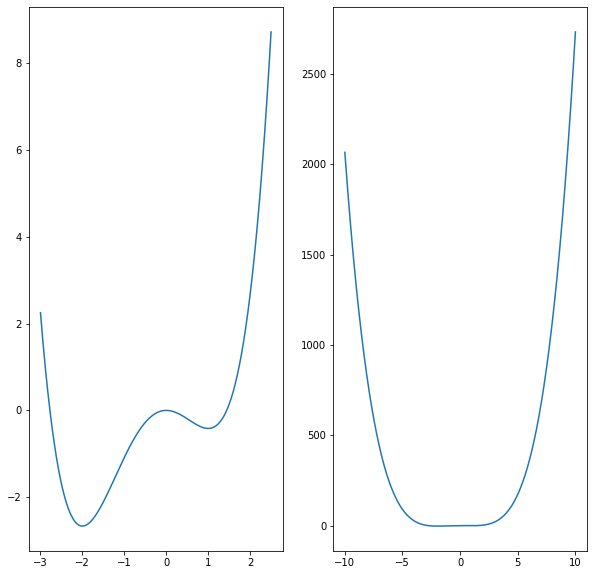

In [3]:
def U(x):
    return ((x**4)/4 + (x**3)/3 - x**2)
fig, axes = plt.subplots(1, 2, figsize=(10, 10))
x1 = np.linspace(-3, 2.5, 1000)
x2 = np.linspace(-10, 10, 1000)
axes[0].plot(x1, U(x1))
axes[1].plot(x2, U(x2))
plt.show()

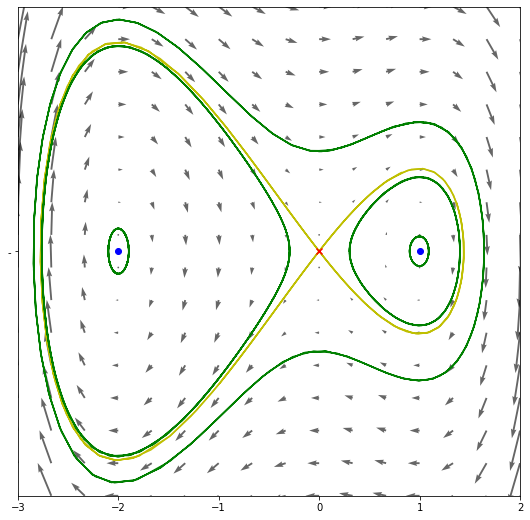

In [4]:
marker_array = ['o', 'o', 'x']
color_array = ['b', 'b', 'r']
# a = get_param_a(0., 0.)
a = 0.
rhs = potential(a)
eq = find_eq()
V = eigenvectors(0., eq[2], a)
plotOnPlane(rhs, [(-3., 2.), (-2.7, 2.7)])
plotEq(eq, marker_array, color_array)
plotSep(rhs, [0., 20.],[0., -20.], eq[2], V)
plotTraj(rhs,[0., 20.], (0., 1.1), 'g')
plotTraj(rhs,[0., 20.], (0.9, 0.), 'g')
plotTraj(rhs,[0., 20.], (0.3, 0.), 'g')
plotTraj(rhs,[0., 20.], (-2.1, 0.), 'g')
plotTraj(rhs,[0., 20.], (-0.3, 0.1), 'g')

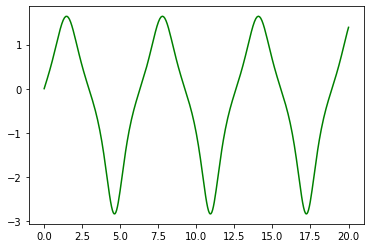

In [5]:
x_t(rhs,[0., 20.], (0., 1.1), 'g')

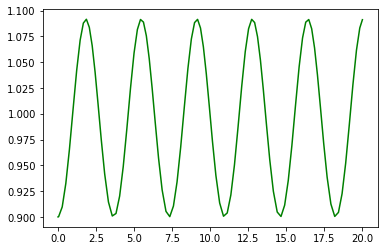

In [6]:
x_t(rhs,[0., 20.], (0.9, 0.), 'g')

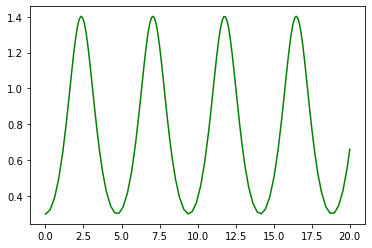

In [7]:
x_t(rhs,[0., 20.], (0.3, 0.), 'g')

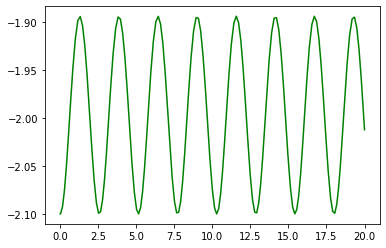

In [8]:
x_t(rhs,[0., 20.], (-2.1, 0.), 'g')

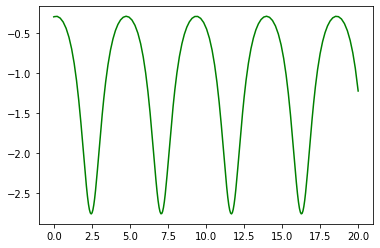

In [9]:
x_t(rhs,[0., 20.], (-0.3, 0.1), 'g')

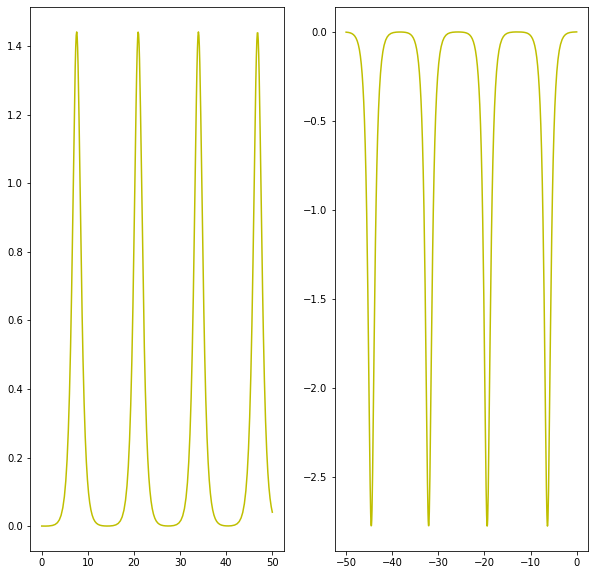

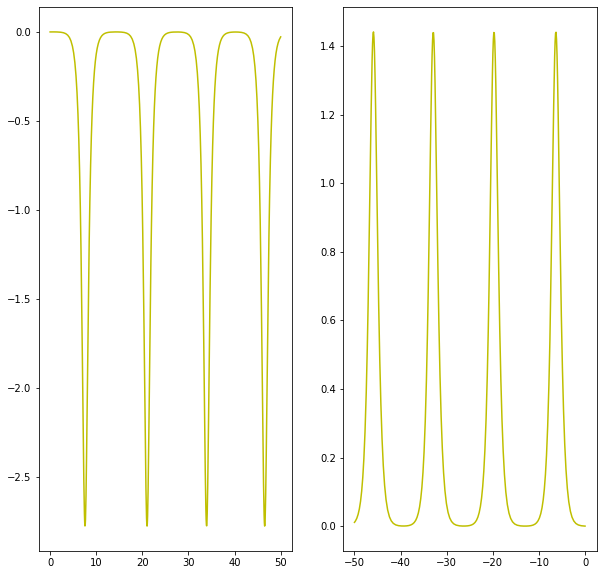

In [10]:
x_t_sep(rhs, [0., 50.], [0., -50.], eq[2], V)

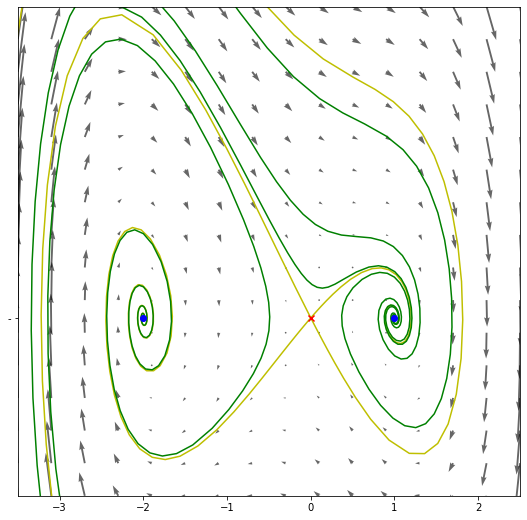

In [11]:
marker_array = ['o', 'o', 'x']
color_array = ['b', 'b', 'r']
# a = get_param_a(0.5, 1., 42) # 42, 
a = 0.75
rhs = potential(a)
V = eigenvectors(0., eq[2], a)
plotOnPlane(rhs, [(-3.5, 2.5), (-2., 3.5)])
plotSep(rhs, [0., 20.], [0., -10.], eq[2], V)
plotEq(eq, marker_array, color_array)
plotTraj(rhs,[0., 40.], (-7, 3.5), 'g')
plotTraj(rhs,[0., 40.], (-2.8, -3.), 'g')
plotTraj(rhs,[0., 40.], (-2.3, 3.5), 'g')
plotTraj(rhs,[0., 40.], (-0.9, 3.5), 'g')

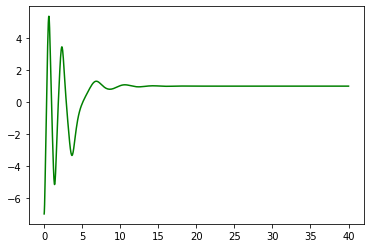

In [12]:
x_t(rhs,[0., 40.], (-7, 3.5), 'g')

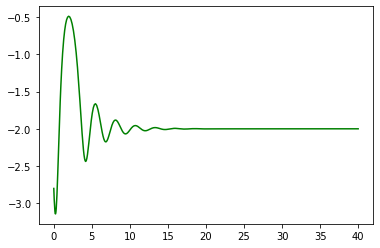

In [13]:
x_t(rhs,[0., 40.], (-2.8, -3.), 'g')

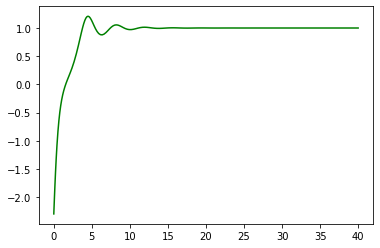

In [14]:
x_t(rhs,[0., 40.], (-2.3, 3.5), 'g')

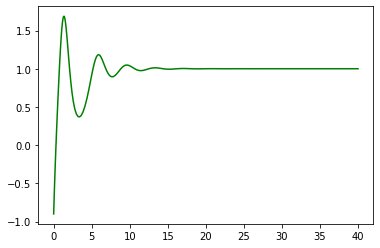

In [15]:
x_t(rhs,[0., 40.], (-0.9, 3.5), 'g')

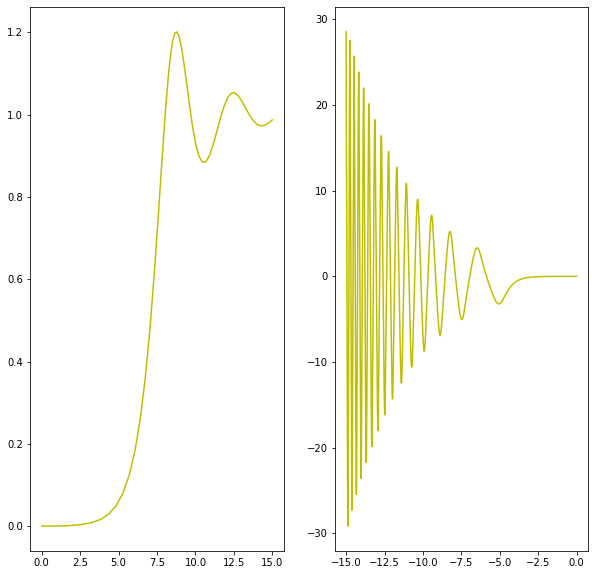

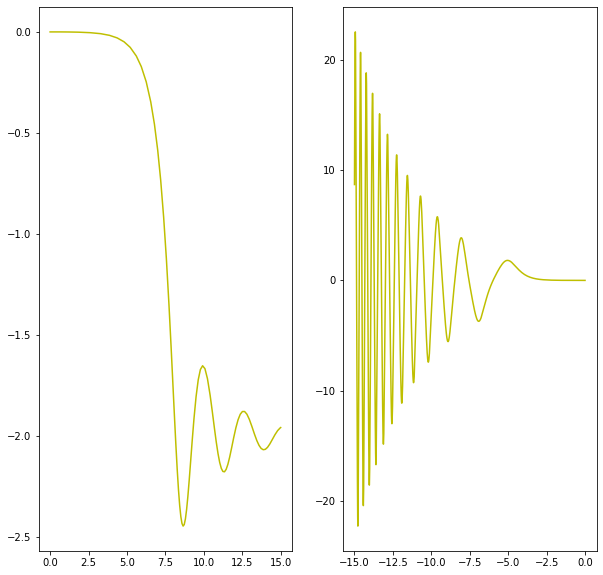

In [16]:
x_t_sep(rhs, [0., 15.], [0., -15.], eq[2], V)

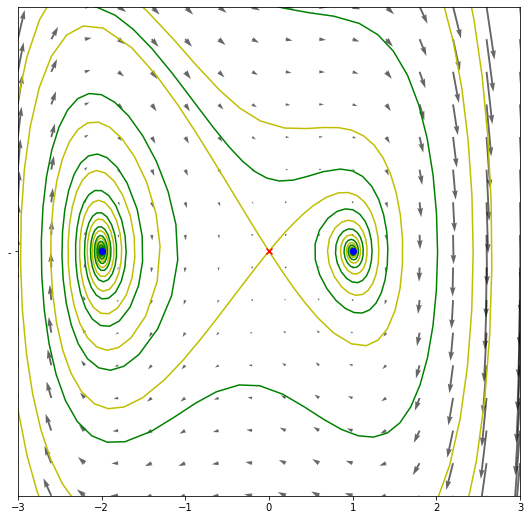

In [17]:
marker_array = ['o', 'o', 'x']
color_array = ['b', 'b', 'r']
# a = get_param_a(0., 0.5, 42) # 42, 9
a = 0.35
rhs = potential(a)
V = eigenvectors(0., eq[2], a)
plotOnPlane(rhs, [(-3., 3.), (-3., 3.)])
plotSep(rhs, [0., 40.], [0., -20.], eq[2], V)
plotEq(eq, marker_array, color_array)
plotTraj(rhs, [0., 40], (0.1, 3.), 'g')
plotTraj(rhs, [0., 40], (-2.1, 3.), 'g')

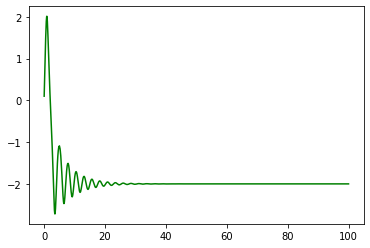

In [18]:
x_t(rhs, [0., 100], (0.1, 3.), 'g')

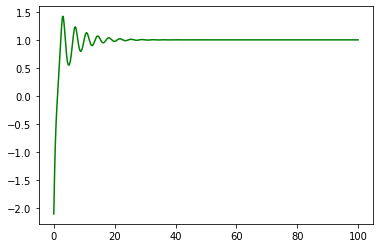

In [19]:
x_t(rhs, [0., 100], (-2.1, 3.), 'g')

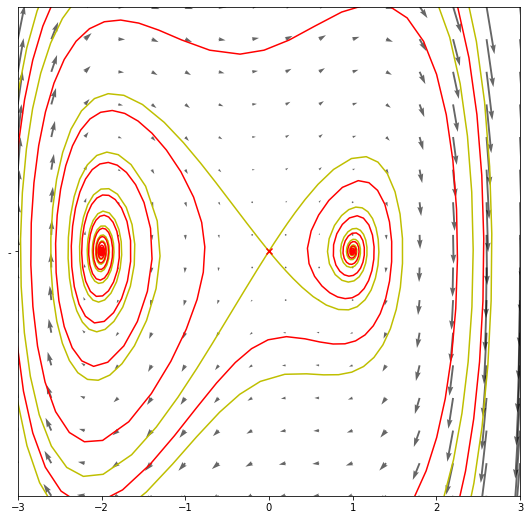

In [20]:
marker_array = ['x', 'x', 'x']
color_array = ['r', 'r', 'r']
# a = get_param_a(-0.5, 0., 42) # 42, 8, 45, 
a = -0.35
rhs = potential(a)
V = eigenvectors(0., eq[2], a)
plotOnPlane(rhs, [(-3., 3.), (-3., 3.)])
plotSep(rhs, [0., -25.],[0., 25.], eq[2], V)
plotEq(eq, marker_array, color_array)
plotTraj(rhs, [0., 40], (1.01, 0.01), 'r')
plotTraj(rhs, [0., 40], (-2.01, 0.01), 'r')

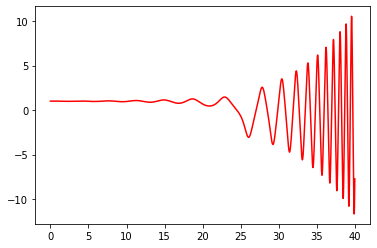

In [21]:
x_t(rhs, [0., 40], (1.01, 0.01), 'r')

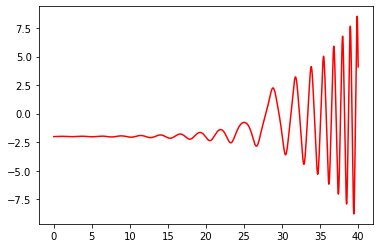

In [22]:
x_t(rhs, [0., 40], (-2.01, 0.01), 'r')

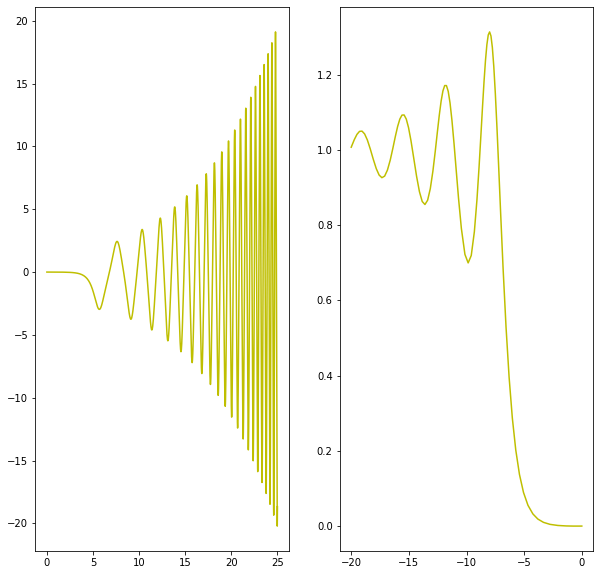

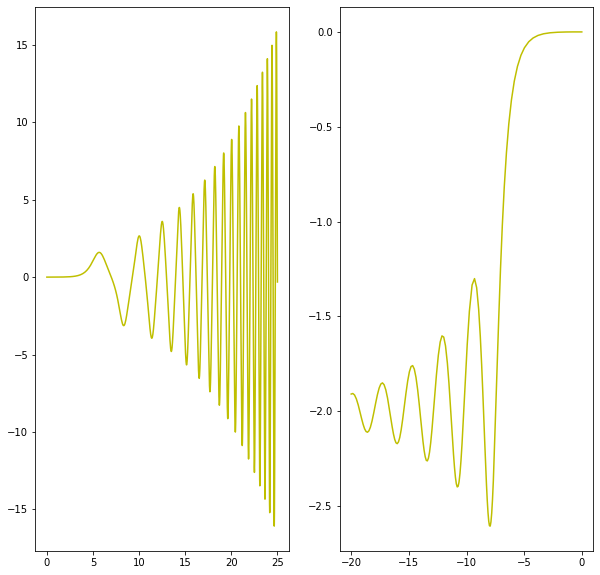

In [23]:
x_t_sep(rhs, [0., 25.], [0., -20.], eq[2], V)

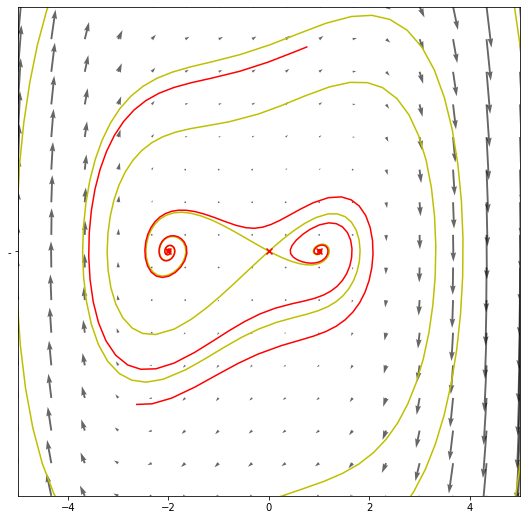

In [24]:
marker_array = ['x', 'x', 'x']
color_array = ['r', 'r', 'r']
# a = get_param_a(-1., -0.5, 7) # 7, 42, 4329
a = -0.75
rhs = potential(a)
V = eigenvectors(0., eq[2], a)
plotOnPlane(rhs, [(-5., 5.), (-10., 10.)])
plotEq(eq, marker_array, color_array)
plotSep(rhs, [0., -15.],[0., 10.], eq[2], V)
plotTraj(rhs, [0., 15], (1.01, 0.01), 'r')
plotTraj(rhs, [0., 15], (-2.01, 0.01), 'r')

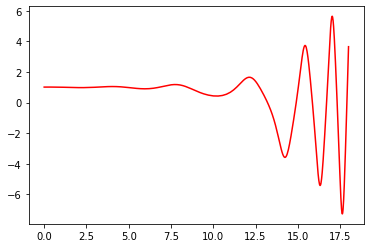

In [25]:
x_t(rhs, [0., 18], (1.01, 0.01), 'r')

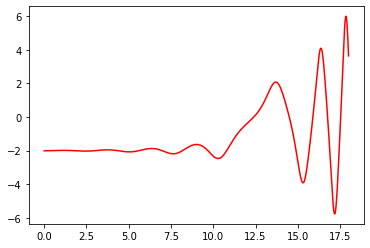

In [26]:
x_t(rhs, [0., 18], (-2.01, 0.01), 'r')

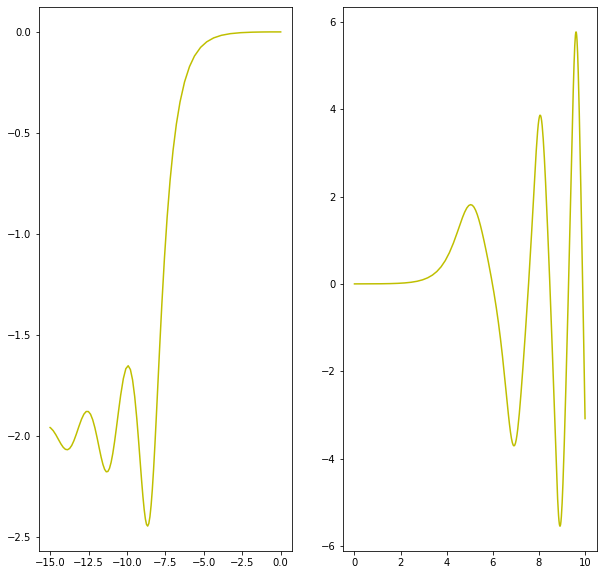

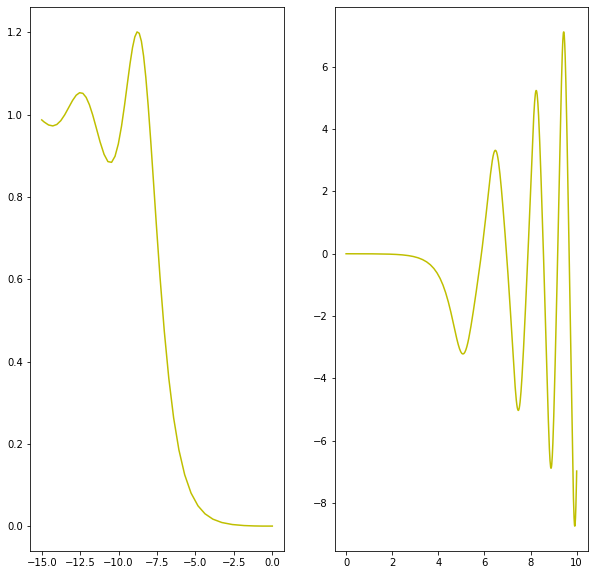

In [27]:
x_t_sep(rhs, [0., -15.],[0., 10.], eq[2], V)

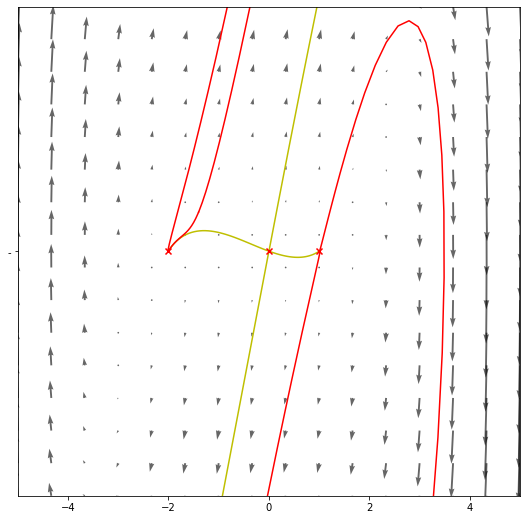

In [28]:
marker_array = ['x', 'x', 'x']
color_array = ['r', 'r', 'r']
# a = get_param_a(-3, -1, 42)
a = -5
rhs = potential(a)
V = eigenvectors(0., eq[2], a)
#plotOnPlane(rhs, [(-2.5, -1.5), (-0.5, 0.5)])
plotOnPlane(rhs, [(-5, 5), (-5, 5)])
plotEq(eq, marker_array, color_array)
plotSep(rhs, [0., 3.],[0., -55.], eq[2], V)
plotTraj(rhs, [0., 3], (1.01, 0.01), 'r')
plotTraj(rhs, [0., 3], (1.01, -0.05), 'r')
plotTraj(rhs, [0., 3], (-2.01, 0.01), 'r')
plotTraj(rhs, [0., 3], (-1.4, 0.8), 'r')
plotTraj(rhs, [0., -3], (-1.4, 0.8), 'r')

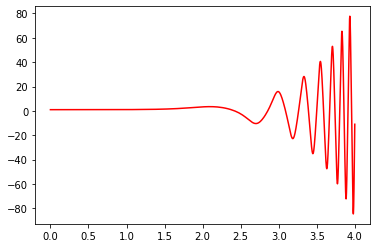

In [32]:
x_t(rhs, [0., 4], (1.01, 0.01), 'r')

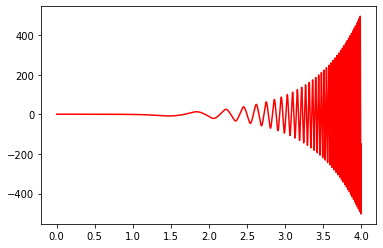

In [34]:
x_t(rhs, [0., 4], (1.01, -0.05), 'r')

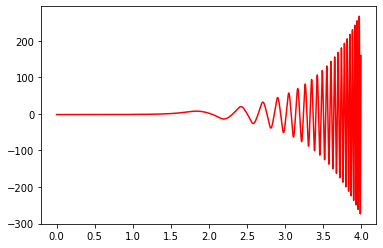

In [35]:
x_t(rhs, [0.,4], (-2.01, 0.01), 'r')

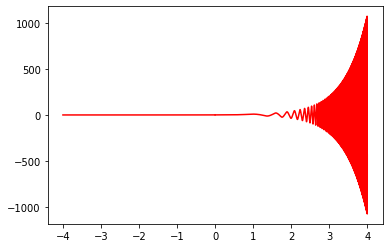

In [36]:
x_t(rhs, [0., 4], (-1.4, 0.8), 'r')
x_t(rhs, [0., -4], (-1.4, 0.8), 'r')

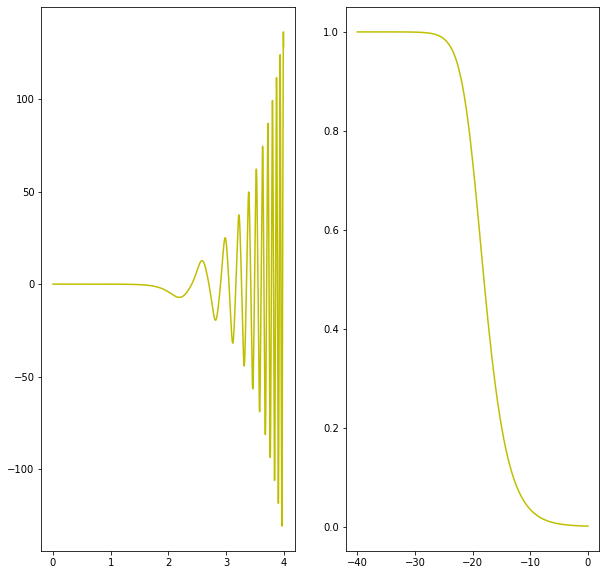

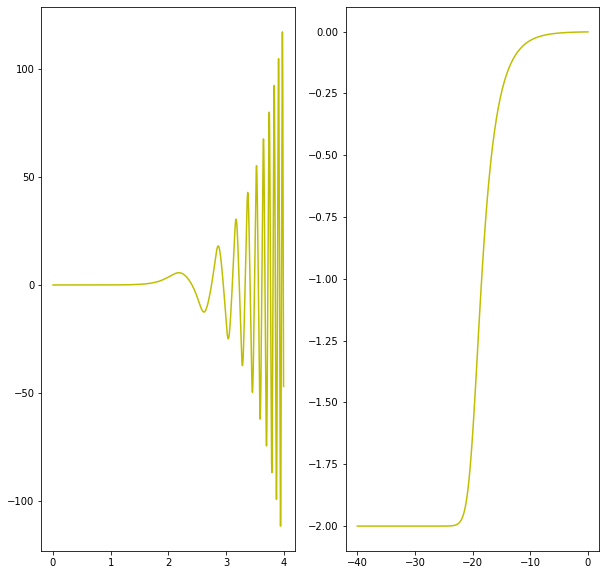

In [38]:
x_t_sep(rhs, [0., 4.],[0., -40.], eq[2], V)

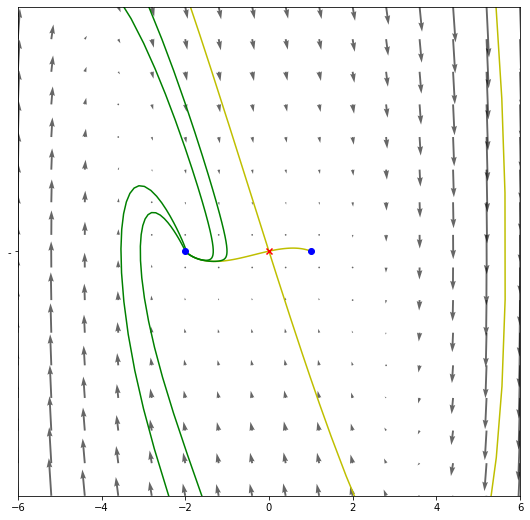

In [39]:
marker_array = ['o', 'o', 'x']
color_array = ['b', 'b', 'r']
#a = get_param_a(1, 3, 42)
a = 5
rhs = potential(a)
V = eigenvectors(0., eq[2], a)
plotOnPlane(rhs, [(-6, 6.), (-10., 10.)])
plotEq(eq, marker_array, color_array)
plotSep(rhs, [0., -3.], [0., 40.], eq[2], V)
plotTraj(rhs, [0., 10], (-1.5, -10.5), 'g')
plotTraj(rhs, [0., 10], (-5, 10.5), 'g')
plotTraj(rhs, [0., 10], (-3, 10.5), 'g')
plotTraj(rhs, [0., 10], (-2.3, -10.5), 'g')

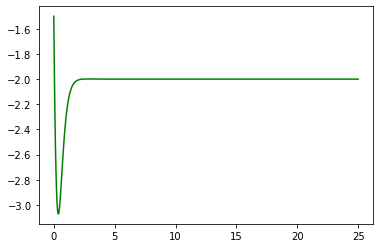

In [40]:
x_t(rhs, [0., 25], (-1.5, -10.5), 'g')

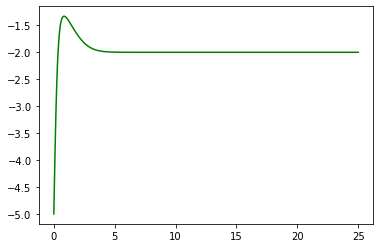

In [41]:
x_t(rhs, [0., 25], (-5, 10.5), 'g')

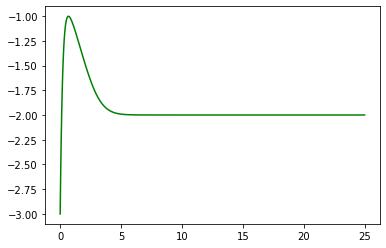

In [42]:
x_t(rhs, [0., 25], (-3, 10.5), 'g')

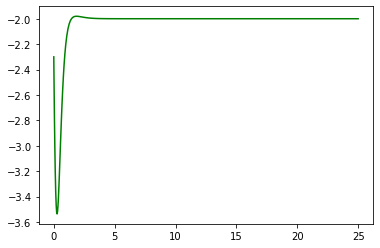

In [43]:
x_t(rhs, [0., 25], (-2.3, -10.5), 'g')

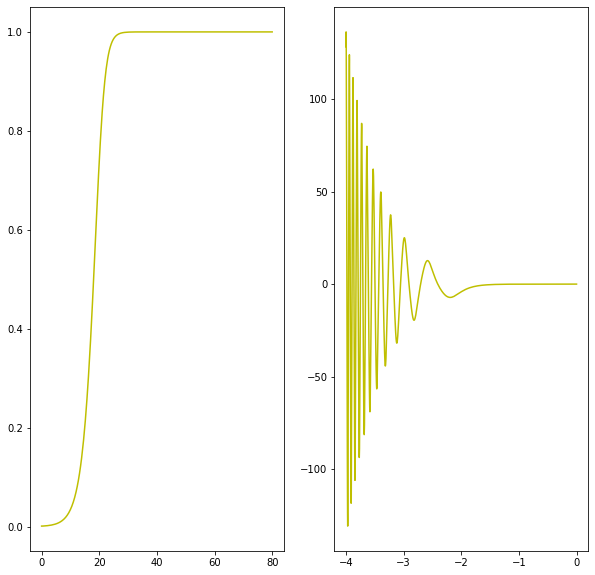

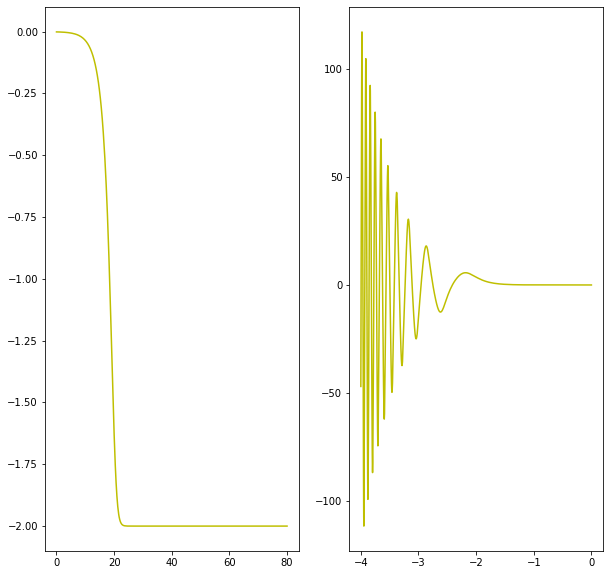

In [44]:
x_t_sep(rhs, [0., 80.],[0., -4.], eq[2], V)